# 4. Model Training

1.1 Import data and required packages

In [21]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import CSV Data

In [22]:
df = pd.read_csv("data/raw.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and Y features

In [23]:
X = df.drop(columns=['math score'], axis=1)

In [24]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [25]:
for col in df.columns:
    if col != "reading score" and col != "writing score" and col != "math score":
        print(f"Category in '{col}': {df[col].unique()}\n")

Category in 'gender': ['female' 'male']

Category in 'race/ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']

Category in 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Category in 'lunch': ['standard' 'free/reduced']

Category in 'test preparation course': ['none' 'completed']



In [26]:
y = df['math score']

In [27]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [28]:
# Create Column Transformer with 3 types of transformer
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features), 
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [29]:
X = preprocessor.fit_transform(X)

In [30]:
X.shape

(1000, 19)

In [31]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [32]:
# Seperate dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model training

In [33]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2


In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVR": SVR(),
    "CatBoost Regressor": CatBoostRegressor(verbose=0),
    "XGB Regressor": XGBRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"{list(models.keys())[i]}:")
    model_list.append(list(models.keys())[i])


    # Model performance on train set
    print("Model performance on train set:")
    print(f"MAE: {model_train_mae}")
    print(f"MSE: {model_train_mse}")
    print(f"RMSE: {model_train_rmse}")
    print(f"R2 Score: {model_train_r2}")
    print("-------------------------------------------------------")

    print("Model performance on test set:")
    print(f"MAE: {model_test_mae}")
    print(f"MSE: {model_test_mse}")
    print(f"RMSE: {model_test_rmse}")
    print(f"R2 Score: {model_test_r2}\n")
    print("============================================================\n")
    r2_list.append(model_test_r2)
    

Linear Regression:
Model performance on train set:
MAE: 4.266711846071957
MSE: 28.33487038064859
RMSE: 5.323050852720514
R2 Score: 0.8743172040139593
-------------------------------------------------------
Model performance on test set:
MAE: 4.21476314247485
MSE: 29.095169866715487
RMSE: 5.393993869732843
R2 Score: 0.8804332983749565


Ridge Regression:
Model performance on train set:
MAE: 4.264987823725981
MSE: 28.33778823308244
RMSE: 5.323324922741654
R2 Score: 0.8743042615212909
-------------------------------------------------------
Model performance on test set:
MAE: 4.211100688014261
MSE: 29.056272192348324
RMSE: 5.390387016935642
R2 Score: 0.8805931485028737


Lasso Regression:
Model performance on train set:
MAE: 5.206302661246526
MSE: 43.47840400585579
RMSE: 6.593815587795566
R2 Score: 0.8071462015863456
-------------------------------------------------------
Model performance on test set:
MAE: 5.157881810347763
MSE: 42.5064168384116
RMSE: 6.519694535667419
R2 Score: 0.8253197

In [35]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model", "R2 Score"]).sort_values(by="R2 Score", ascending=False)

,Model,R2 Score
1,Ridge Regression,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.854069
8,CatBoost Regressor,0.851632
6,AdaBoost Regressor,0.843703
9,XGB Regressor,0.827797
2,Lasso Regression,0.825320
3,KNN Regressor,0.783813
4,Decision Tree Regressor,0.756491
7,SVR,0.728600


### Plot y_pred and y_test

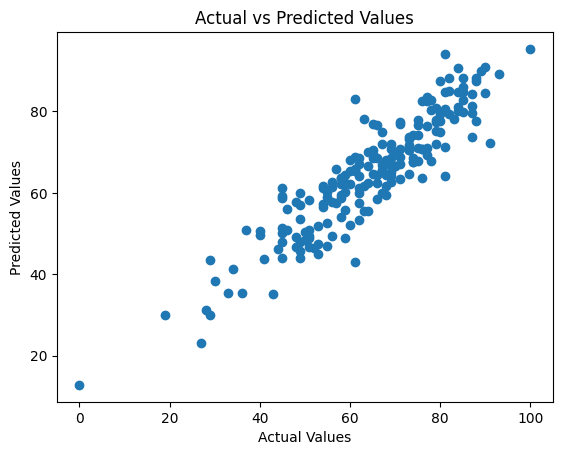

In [36]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted Values with Regression Line')

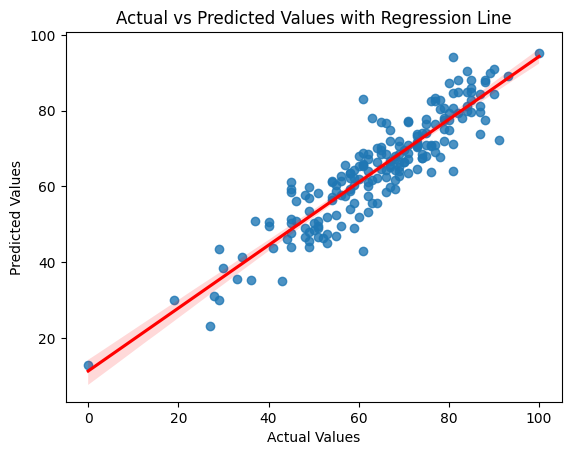

In [37]:
sns.regplot(x=y_test, y=y_test_pred, line_kws={"color": "red"})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values with Regression Line")

### Difference Between Actucal and Predicted Values

In [38]:
pred_df = pd.DataFrame({"Actual Values": y_test, "Predicted Values": y_test_pred, "Difference": y_test - y_test_pred})
pred_df.sample(5)

,Actual Values,Predicted Values,Difference
208,74,67.617630,6.382370
101,68,67.953194,0.046806
499,76,82.451462,-6.451462
439,89,89.896072,-0.896072
716,73,73.807220,-0.807220
